Tenzin Yangzom

8896839

**Lab 9 - Dense Neural Network**

- Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).
- Train a dense neural network using Keras (2 points)
- Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [40]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [41]:
# Loading the Dataset
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

*Data Exploration*

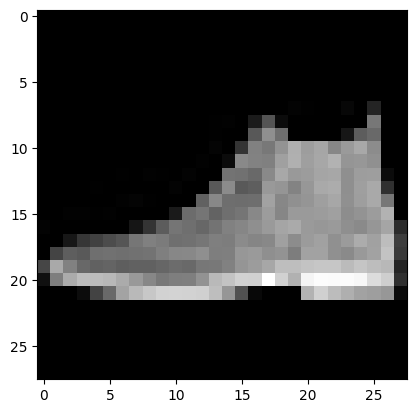

In [42]:
# plot the first image in the training set in grayscale
import matplotlib.pyplot as plt
plt.imshow(test_images[0], cmap='gray')

In [43]:
# print the label of the first image in the training set   
print(f'Label: {train_labels[0]}')

Label: 9


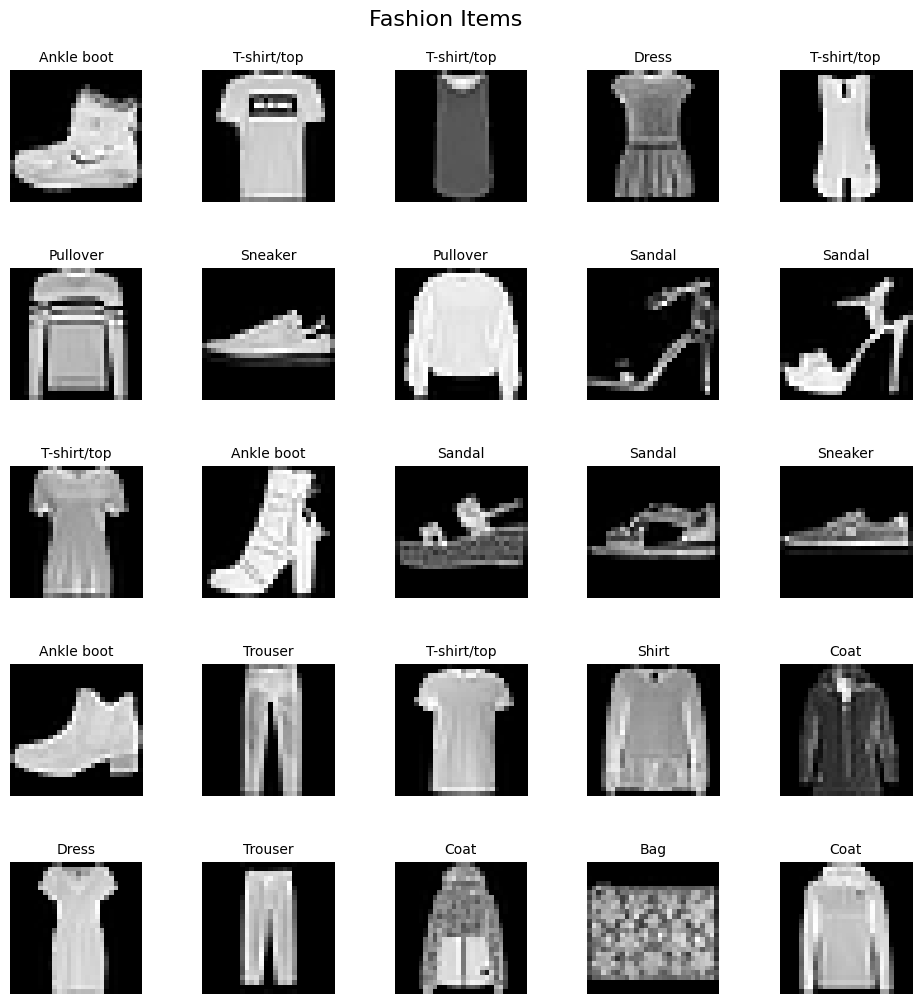

In [44]:
import matplotlib.pyplot as plt

label_description = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

plt.figure(figsize=(12, 12))  # Increase the figure size

# Change the layout to 5 rows and 5 columns, adjust spacing
rows, cols = 5, 5
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(train_images[i], cmap='gray')  # Include cmap=gray to display grayscale images
    plt.title(label_description[train_labels[i]], fontsize=10)  # Modify font size
    plt.axis('off')

plt.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots
plt.suptitle("Fashion Items", fontsize=16, y=0.93)  # Add a main title for the whole plot
plt.show()


In [45]:
# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images
train_images = train_images.reshape(train_images.shape[0], 784) # 28*28
test_images = test_images.reshape(test_images.shape[0], 784)



In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
loss='sparse_categorical_crossentropy', 
metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4999 - accuracy: 0.8220 - val_loss: 0.4309 - val_accuracy: 0.8427
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3748 - accuracy: 0.8622 - val_loss: 0.3753 - val_accuracy: 0.8632
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3381 - accuracy: 0.8766 - val_loss: 0.3455 - val_accuracy: 0.8710
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3129 - accuracy: 0.8847 - val_loss: 0.3333 - val_accuracy: 0.8787
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2963 - accuracy: 0.8895 - val_loss: 0.3280 - val_accuracy: 0.8790
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2799 - accuracy: 0.8963 - val_loss: 0.3447 - val_accuracy: 0.8785
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2670 - accuracy: 0.8988 - val_loss: 0.3296 - val_accuracy:

In [47]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)


  1/313 [..............................] - ETA: 12s - loss: 0.4233 - accuracy: 0.9062

313/313 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8819
Test Accuracy: 0.8819000124931335


313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[833   1  11  40   5   3 100   0   7   0]
 [  2 962   2  28   2   0   3   0   1   0]
 [ 16   0 827  15  58   0  82   0   1   1]
 [ 17   2   8 924  28   0  18   0   3   0]
 [  0   0 135  39 716   0 109   0   1   0]
 [  0   0   0   1   0 966   0  17   1  15]
 [125   0  81  39  49   1 695   0  10   0]
 [  0   0   0   0   0  16   0 958   0  26]
 [  3   0   4   8   2   2   4   3 974   0]
 [  0   0   0   0   0   5   1  30   0 964]]

Incorrect Classification Examples:
True Label: 4, Predicted Label: 2


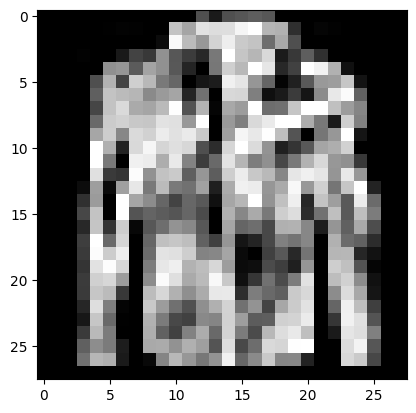

True Label: 9, Predicted Label: 5


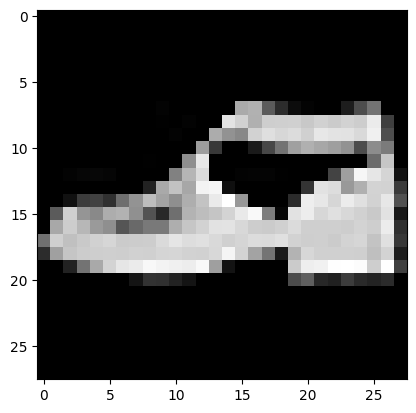

True Label: 4, Predicted Label: 2


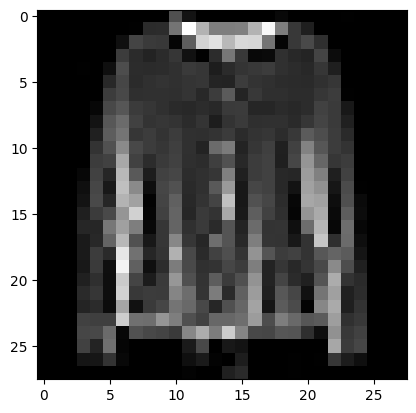

True Label: 6, Predicted Label: 0


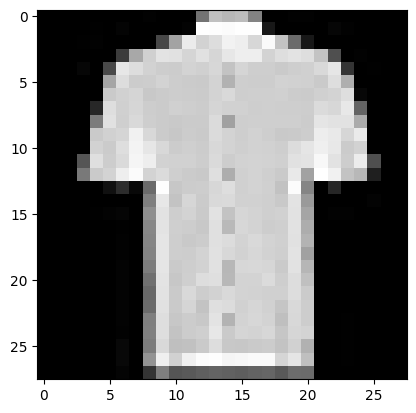

True Label: 3, Predicted Label: 6


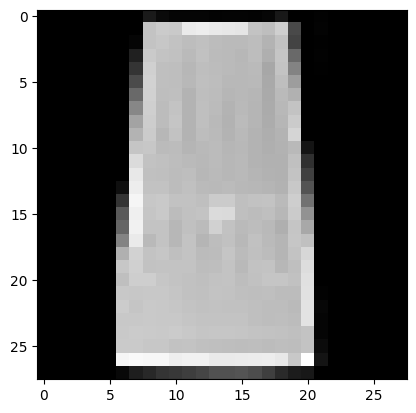

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Get predictions on the test data
predictions = np.argmax(model.predict(test_images), axis=-1)

# Create a confusion matrix
confusion_mtx = confusion_matrix(test_labels, predictions)

# Explore incorrect classifications
incorrect_examples = []
for i in range(len(test_labels)):
    if test_labels[i] != predictions[i]:
        incorrect_examples.append((test_images[i].reshape(28, 28), test_labels[i], predictions[i]))

# Print confusion matrix and incorrect examples
print("Confusion Matrix:")
print(confusion_mtx)
print("\nIncorrect Classification Examples:")
for example in incorrect_examples[:5]:  # Display first 5 incorrect examples
    true_label, predicted_label = example[1], example[2]
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.imshow(example[0], cmap='gray')
    plt.show()


The amount of accurate predictions for each class is represented by the diagonal elements from top-left to bottom-right. 
For instance, 
- class 0 has 833 accurate predictions
- class 1 has 962, and so forth.

Misclassifications are represented by the off-diagonal elements. As evidenced by the (true label: 4, predicted label: 2) entry, 135 samples of class 4 were incorrectly categorised as belonging to class 2.